In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,NaN,1.43430,3.12990,NaN,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,NaN,1.33710,3.76820,1.21000,3.99630,NaN,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,NaN,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,NaN,0.15740,0.46504,NaN
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,NaN,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	53
float64		column 2	47
float64		column 3	40
float64		column 4	40
float64		column 5	38
float64		column 6	43
float64		column 7	45
float64		column 8	31
float64		column 9	42
float64		column 10	33
float64		column 11	35
float64		column 12	33


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,347.000000,353.000000,360.000000,360.000000,362.000000,357.000000,355.000000,369.000000,358.000000,367.000000,365.000000,367.000000
mean,-0.218968,0.039051,2.050752,1.894363,1.963324,1.968935,2.045937,1.986559,1.936190,2.034128,1.997655,1.925152
std,2.508508,2.765514,1.143337,1.156057,1.165496,1.143593,1.162129,1.151871,1.141359,1.173415,1.152832,1.165312
min,-7.771000,-6.679300,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.732455,-0.893850,1.119050,0.947260,0.888977,0.993430,1.051150,1.027900,0.957795,1.006600,0.966100,0.936035
50%,-0.077131,-0.039491,2.106300,1.777500,1.954450,2.004600,2.100400,1.951100,1.968100,2.131800,1.965600,1.886400
75%,0.685975,0.887210,3.001300,2.810475,3.013325,2.966200,3.006200,3.048200,2.903050,3.072950,3.000400,2.934950
max,7.293000,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

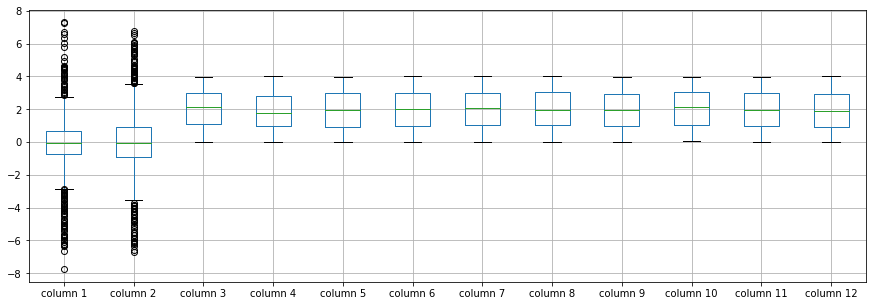

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.218968
column 2     0.039051
column 3     2.050752
column 4     1.894363
column 5     1.963324
column 6     1.968935
column 7     2.045937
column 8     1.986559
column 9     1.936190
column 10    2.034128
column 11    1.997655
column 12    1.925152
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.049607,-0.073360,-0.076281,0.024872,0.024711,-0.027633,0.076607,-0.008020,0.000804,0.124492,-0.026223
column 2,0.049607,1.000000,-0.084722,0.085139,-0.093114,-0.098513,0.041372,-0.002224,0.009908,0.028757,-0.057423,0.119426
column 3,-0.073360,-0.084722,1.000000,0.010354,-0.016437,-0.091170,-0.061098,0.047415,0.100316,-0.019931,-0.090824,0.022150
column 4,-0.076281,0.085139,0.010354,1.000000,-0.032248,0.104560,0.027280,0.093409,0.009620,0.070837,-0.041423,-0.060283
column 5,0.024872,-0.093114,-0.016437,-0.032248,1.000000,0.062136,0.016364,0.029219,0.003992,0.023144,0.004390,-0.042097
column 6,0.024711,-0.098513,-0.091170,0.104560,0.062136,1.000000,-0.073637,0.026820,0.003264,0.015349,0.005274,-0.050740
column 7,-0.027633,0.041372,-0.061098,0.027280,0.016364,-0.073637,1.000000,0.014058,0.092047,0.019418,-0.025512,-0.054742
column 8,0.076607,-0.002224,0.047415,0.093409,0.029219,0.026820,0.014058,1.000000,0.076060,-0.162902,-0.008481,0.008462
column 9,-0.008020,0.009908,0.100316,0.009620,0.003992,0.003264,0.092047,0.076060,1.000000,0.006327,-0.039180,0.091935
column 10,0.000804,0.028757,-0.019931,0.070837,0.023144,0.015349,0.019418,-0.162902,0.006327,1.000000,0.013074,0.039255


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+35,12+35+35,12+35+35+35,12+35+35+35+35,12+35+35+35+35+35,12+35+35+35+35+35+35,12+35+35+35+35+35,12+35+35+35+35,12+35+35+35,12+35+35,12+35,12], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.085852127075196
Epoch: 1 , loss: 25.01974411010742
Epoch: 2 , loss: 24.908731079101564
Epoch: 3 , loss: 24.750429534912108
Epoch: 4 , loss: 24.488067321777343
Epoch: 5 , loss: 22.817218399047853
Epoch: 6 , loss: 21.56185104370117
Epoch: 7 , loss: 21.41073875427246
Epoch: 8 , loss: 21.109498138427735
Epoch: 9 , loss: 20.750378494262694
Epoch: 10 , loss: 20.576227340698242
Epoch: 11 , loss: 20.221163864135743
Epoch: 12 , loss: 20.03087890625
Epoch: 13 , loss: 19.719972991943358
Epoch: 14 , loss: 19.246775436401368
Epoch: 15 , loss: 19.54659782409668
Epoch: 16 , loss: 19.100128479003907
Epoch: 17 , loss: 18.99526138305664
Epoch: 18 , loss: 18.668818740844728
Epoch: 19 , loss: 18.53522918701172
Epoch: 20 , loss: 18.50991325378418
Epoch: 21 , loss: 18.088094787597655
Epoch: 22 , loss: 18.049997024536133
Epoch: 23 , loss: 17.880513229370116
Epoch: 24 , loss: 17.897820663452148
Epoch: 25 , loss: 17.7078451

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0,0.000000
1,0.0000,0.0,0.268357,0.0,0.0,-0.517472,0.0,0.000000,0.00000,0.00000,0.0,0.000000
2,0.0000,0.0,0.156071,0.0,0.0,0.000000,0.0,-0.476039,0.00000,0.00000,0.0,0.000000
3,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0,0.000000
4,0.0000,0.0,-1.956368,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.01131,0.00000,0.0,-0.785282
396,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0,0.000000
397,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.0,0.000000
398,0.0000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,-1.43426,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(38.92577739579747, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.2384070022507049

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     3.956600
column 6     1.645201
column 7     1.731893
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    1.735388
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.83630,2.88660,2.469600,0.21541,3.090000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.756967,1.43430,3.12990,0.760328,1.42850,0.143330,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.766571,1.33710,3.76820,1.210000,3.99630,1.741261,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.364860,0.33278,0.19027,0.567160,1.66010,2.352700,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,0.925832,1.56160,3.20140,3.377400,1.52260,0.984750,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,0.88269,0.354060,1.62780,3.294000,2.09631,0.15740,0.46504,2.066118
396,0.264630,-6.107600,3.905400,1.33770,1.41870,1.686100,1.09510,3.793600,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.324800,1.77210,2.55090,1.470100,0.92540,1.841100,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.494800,0.39655,2.99900,3.410100,2.95160,0.278000,0.99059,2.00314,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_C_10(imp).xlsx", index=False, header=False)